## Final Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex (self paced / part time)
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Microsoft Movie Analysis 

## Overview

This project analyzes characteristics and factors of movies that are correlated to success at the box office to generate insights and recommendations for the stakeholder. Descriptive analysis of budget, gross earnings, genre and run time will be explored to see how these are related to movie success and return on investment (Measured by Net Gross Earnings). Microsoft stakeholders can use this analyis to decide what type of films to create and what budgets to plan for.

## Business Problem


Microsoft is planning to create a new movie studio to get into the original video/film space. They do not have any background in creating movies and what makes a successful film. Through exploring data from sources such as Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers, I plan to explore what types of films are doing the best at the box office and find out what characterics are correlated to movie success. For this analysis, movie success will be defined as overall net gross earnings (Total gross earning - budget/cost).These finding will be translated into actionable insights that can help Microsoft's new movie studio decide what direction to take when creating new films. 

## Data Understanding

I will be exploring data sets from Box Office Mojo, The Numbers and IMDB for this analysis. 


In [1]:
#Import Standard Packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sqlite3 
from zipfile import ZipFile 

In [2]:
#Importing Imdb Dataset

with ZipFile(r"/Users/lucaswilkerson/Desktop/Phase1_project/dsc-phase-1-project-v2-4/zippedData/im.db.zip", 'r') as zfiles:
   zfiles.printdir()
   zfiles.extractall()

#Reading in additional files need from The Numbers Budget Dataset and Box Office Mojo

tn_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
bom_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328


In [3]:
#Previewing dataset
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#Previewing dataset info
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The Numbers Budget dataset contains 5782 records with 6 columns. Columns include id, release_date, movie, production_budget domestic_gross, and worldwide_gross with their data types being integer, object, object, object 
and object respectively. There are no missing values in this dataset. The production_budget, domestic_gross and worldwide_gross columns will need to be reformatted for calculations. 

In [5]:
#Previewing dataset
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#Previewing dataset
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The Box Office Mojo Dataset contains 3387 records with 5 columns. Columns include title, studio, domestic_gross, foreign_gross and year with their data types being object, object, float, object and integer respecitvely. 
There are missing values in the columns studio (5), domestic_gross (28), and foreign_gross (1350). 

In [25]:
#exploring IMDB dataset
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_akas
""",
    conn,
)
imdb_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [26]:
#will need movie_id, primary_title, original_title, runtime_minutes, genres, averagerating, numvotes,
#title, is_original_title

conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_movies = pd.read_sql(
    """
SELECT b.movie_id, 
       b.runtime_minutes, 
       b.genres, 
       r.averagerating, 
       r.numvotes,
       a.title, 
       a.is_original_title
FROM movie_basics as b
JOIN movie_ratings as r
    USING (movie_id)
JOIN movie_akas as a
    USING (movie_id)
WHERE is_original_title is 1.0
GROUP BY movie_id, genres

""",
    conn,
)
imdb_movies

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,is_original_title
0,tt0063540,175.0,"Action,Crime,Drama",7.0,77,Sunghursh,1.0
1,tt0066787,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din,1.0
2,tt0069049,122.0,Drama,6.9,4517,The Other Side of the Wind,1.0
3,tt0069204,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh,1.0
4,tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...
36852,tt9899860,100.0,"Drama,Thriller",8.1,7,Didan in film jorm ast,1.0
36853,tt9899880,85.0,Comedy,5.8,5,Columbus,1.0
36854,tt9903952,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,1.0
36855,tt9905462,111.0,Drama,8.4,600,Pengalila,1.0


Looking at the IMDB dataset and the Movie Data ERD I have detertmined I the columns needed will need to be title, runtime_minutes, genres and movie_id. To acquire these various columns I started with the movie_basics tables and performed joins on the movie_ratings and movies_akas via movie_id. I set original_title to one because I wanted to return movies that had their original title and then grouped but movie_id and genre. This yielded 36857 entries. 

## Data Preparation

Looking at the initial information from the data sets, I have decided to forgo using the Box Office Mojo data set and will be using the The Numbers data set and the IMBD data set. While Box Office Mojo had relevant information on gross earings, it lacked production budget which is needed for further analysis of overall net gross earnings. The Numbers data set contains both production budget and worldwide gross for the movies, while the IMDB dataset contains genres and the run times of the movies. These datasets will be combined to look at our variables of budget, run time, and genre when compared to net grooss earnings. 


To start, I will convert the column data types of domestic gross, worldwide gross and production budget from the Numbers data set from objects to integers to allow for further mathematical calculations. 

#Reformatting values for domestic gross, worldwide_gross and production_budget
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$', '')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].astype(float)

tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$', '')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].astype(float)

tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$', '')
tn_budgets['production_budget'] = tn_budgets['production_budget'].astype(float)


#could use lambda function, int() method, .apply( ) 

movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))

In [7]:
#Reformatting values for domestic gross, worldwide_gross and production_budget
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
tn_budgets['production_budget'] = tn_budgets['production_budget'].apply(
    lambda x: int(x.replace('$','').replace(',','')))

In [8]:
# dropping rows with 0 values for budget and gross columns
tn_budget_cleaned = tn_budgets.loc[(tn_budgets.domestic_gross != 0) 
                                       &(tn_budgets.worldwide_gross != 0) 
                                       &(tn_budgets.production_budget != 0)]

#Setting index to ID 
#tn_budget_cleaned= tn_budget_cleaned.set_index('id', inplace = True)


In [9]:
tn_budget_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5234 non-null   int64 
 1   release_date       5234 non-null   object
 2   movie              5234 non-null   object
 3   production_budget  5234 non-null   int64 
 4   domestic_gross     5234 non-null   int64 
 5   worldwide_gross    5234 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 286.2+ KB


I have removed any rows that have a 0 value for the columns of domestic gross, worldwide gross and production budget from the Numbers data set to further clean the data. This leaves the data set with 5234 entries with no NaN values. 

Next I am creating a new column for my success metric of Total Net Gross earnings. This is calculated by calculating the difference between worldwide gross and production budget. The data set will then be sorted by net gross to review the top 10 highest net grossing movies. 

In [10]:
#Making a new column for Net gross earning (worldwide gross- production budget) and sorting by Net_gross

tn_budget_cleaned['Net_Gross']= tn_budget_cleaned['worldwide_gross'] - tn_budget_cleaned['production_budget']
top_gross_movies= tn_budget_cleaned.sort_values("Net_Gross", ascending = False)

#Previewing Top Grossing movies
top_gross_movies.head(10)

<ipython-input-10-d3b74269c838>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_budget_cleaned['Net_Gross']= tn_budget_cleaned['worldwide_gross'] - tn_budget_cleaned['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799


To make visuals more legible, additional columns will be created for production budget and net gross to have values by the millions. 

In [11]:
#Adding columns adjusting budget and gross to millions
top_gross_movies['budget_millions']= (top_gross_movies["production_budget"]/1000000)
top_gross_movies['Net_gross_millions']=(top_gross_movies["Net_Gross"]/1000000)

# Data Analysis 

## Production Budget Analysis

In [ ]:
# clean up title
#polish legend
# change title of harry potter for legibility 

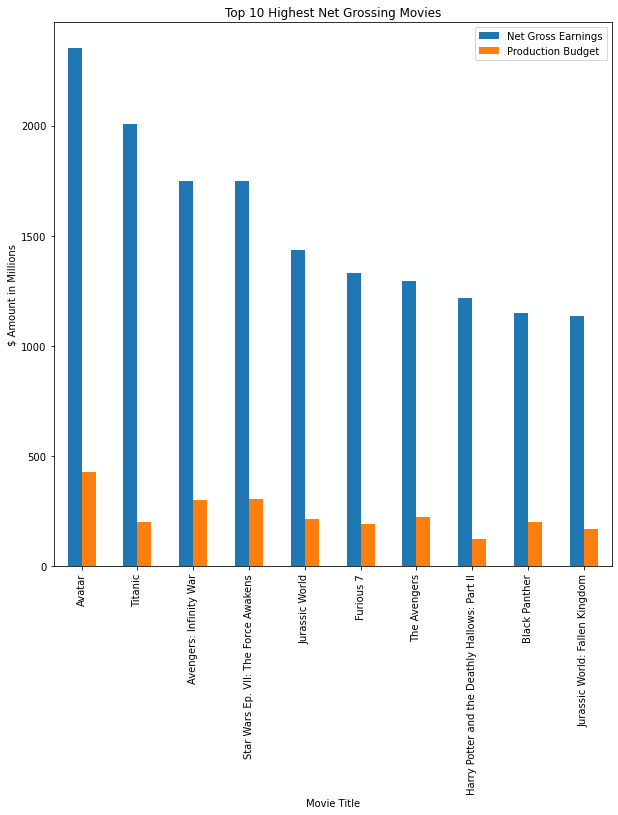

In [19]:
top10_movies_gross = top_gross_movies.head(10)
top10_movies_gross.plot(
    x="movie", y=["Net_gross_millions", "budget_millions"], kind="bar", figsize= (10,10))

plt.xlabel("Movie Title")
plt.ylabel("$ Amount in Millions")
plt.legend(["Net Gross Earnings", "Production Budget"])
plt.title("Top 10 Highest Net Grossing Movies")
plt.show()

In [20]:
#checking correlation between movie budget and net gross
top_gross_movies["production_budget"].corr(top_gross_movies["Net_Gross"])

0.605544253487369

Looking at the data and correlations it seems that production budget does have a positive association with overall net gross earnings. 

In [22]:
#getting statistic calculations
top_gross_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5234.0,5.034658e+01,2.884867e+01,1.000000e+00,2.500000e+01,5.000000e+01,7.500000e+01,1.000000e+02
production_budget,5234.0,3.403348e+07,4.296048e+07,1.100000e+03,6.500000e+06,2.000000e+07,4.500000e+07,4.250000e+08
domestic_gross,5234.0,4.625747e+07,7.029651e+07,3.880000e+02,4.289718e+06,2.198422e+07,5.756598e+07,9.366622e+08
worldwide_gross,5234.0,1.007615e+08,1.811226e+08,4.010000e+02,8.142571e+06,3.543844e+07,1.093357e+08,2.776345e+09
Net_Gross,5234.0,6.672803e+07,1.518522e+08,-2.002376e+08,-1.396634e+06,1.357260e+07,7.088258e+07,2.351345e+09
budget_millions,5234.0,3.403348e+01,4.296048e+01,1.100000e-03,6.500000e+00,2.000000e+01,4.500000e+01,4.250000e+02
Net_gross_millions,5234.0,6.672803e+01,1.518522e+02,-2.002377e+02,-1.396634e+00,1.357260e+01,7.088258e+01,2.351345e+03


In [23]:
#finding out the average production budget for films in millions
print((top_gross_movies["production_budget"].mean())/1000000)

#finding avg net gross for films in millions
print((top_gross_movies["Net_Gross"].mean())/1000000)

34.03348004948414
66.72802610546427


In [24]:
#finding budget for top 100 grossing films in millions
top100_gross_movies = top_gross_movies.head(100)
print((top100_gross_movies["production_budget"].mean())/1000000)

#finding avg net gross for top 100 grossing films in millions
print((top100_gross_movies["Net_Gross"].mean())/1000000)

159.522
850.39601654


When it comes average production budget vs average net gross, the average production budget for a film is roughly 34 million dollars and the average net gross earnings is 66 million dollars. The median production budget is roughly 20 million dollars while the median net gross is ~15 million. Looking at the top 100 grossing movies, the average production budget for those films is roughly 159-160 million dollars and the average net gross earnings is 850 million dollars. While the average production budget of 34 million can return a profit, if looking for a higher net gross profit I would recommend planning for a budget near 160 million. 

## Run Time 

In [19]:
#exploring IMDB dataset
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_akas
""",
    conn,
)
imdb_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [20]:
#will need movie_id, primary_title, original_title, runtime_minutes, genres, averagerating, numvotes,
#title, is_original_title

conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_movies = pd.read_sql(
    """
SELECT b.movie_id, 
       b.runtime_minutes, 
       b.genres, 
       r.averagerating, 
       r.numvotes,
       a.title, 
       a.is_original_title
FROM movie_basics as b
JOIN movie_ratings as r
    USING (movie_id)
JOIN movie_akas as a
    USING (movie_id)
WHERE is_original_title is 1.0
GROUP BY movie_id, genres

""",
    conn,
)
imdb_movies

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,is_original_title
0,tt0063540,175.0,"Action,Crime,Drama",7.0,77,Sunghursh,1.0
1,tt0066787,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din,1.0
2,tt0069049,122.0,Drama,6.9,4517,The Other Side of the Wind,1.0
3,tt0069204,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh,1.0
4,tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...
36852,tt9899860,100.0,"Drama,Thriller",8.1,7,Didan in film jorm ast,1.0
36853,tt9899880,85.0,Comedy,5.8,5,Columbus,1.0
36854,tt9903952,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,1.0
36855,tt9905462,111.0,Drama,8.4,600,Pengalila,1.0


In [21]:
#dropping nulls and renaming title to movie to merge with top grossing movies df
imdb_movies= imdb_movies.dropna()
imdb_movies= imdb_movies.rename(columns= {"title": "movie"})

In [22]:
#merging data frames
top_movies_all = pd.merge(top_gross_movies, imdb_movies, how = "left", on= ["movie"])
top_movies_all.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,runtime_minutes,genres,averagerating,numvotes,is_original_title
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,425.0,2351.345279,NaN,NaN,NaN,NaN,NaN,NaN
1,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,200.0,2008.208395,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,300.0,1748.134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.0
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,306.0,1747.311220,NaN,NaN,NaN,NaN,NaN,NaN
4,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,215.0,1433.854864,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.0
5,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,190.0,1328.722794,NaN,NaN,NaN,NaN,NaN,NaN
6,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,225.0,1292.935897,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.0
7,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,125.0,1216.693157,NaN,NaN,NaN,NaN,NaN,NaN
8,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,200.0,1148.258224,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.0
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,170.0,1135.772799,tt4881806,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,1.0


In [23]:
#Checking info 
top_movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5366 entries, 0 to 5365
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5366 non-null   int64  
 1   release_date        5366 non-null   object 
 2   movie               5366 non-null   object 
 3   production_budget   5366 non-null   float64
 4   domestic_gross      5366 non-null   float64
 5   worldwide_gross     5366 non-null   float64
 6   Net_Gross           5366 non-null   float64
 7   budget_millions     5366 non-null   float64
 8   Net_gross_millions  5366 non-null   float64
 9   movie_id            1801 non-null   object 
 10  runtime_minutes     1801 non-null   float64
 11  genres              1801 non-null   object 
 12  averagerating       1801 non-null   float64
 13  numvotes            1801 non-null   float64
 14  is_original_title   1801 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 670.8

In [25]:
#dropping any duplicate movies and also dropping NaNs
top_movies_all= top_movies_all.drop_duplicates(subset= ['movie'])
top_movies_dropped_null= top_movies_all.dropna()

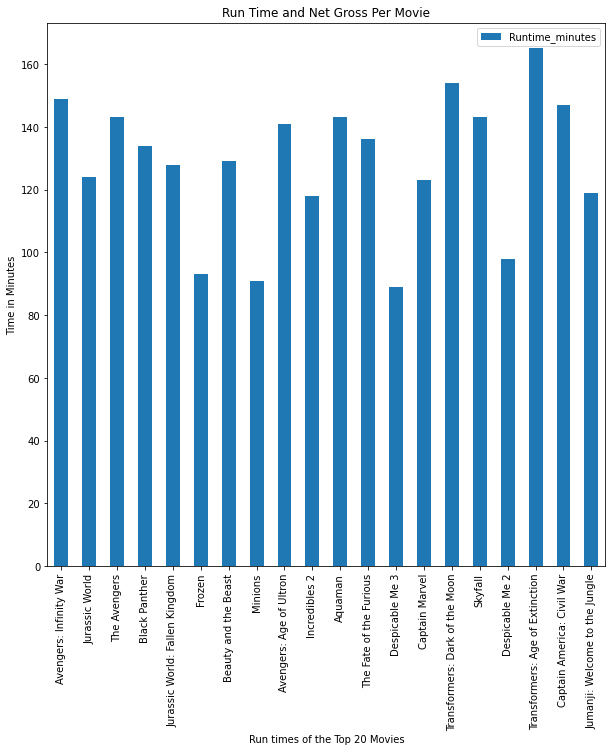

In [27]:
#bar graph of the top 20 grossing movies and run time
top20_movies_runtime= top_movies_dropped_null.head(20)
top20_movies_runtime.plot(
    x="movie", y=["runtime_minutes"], kind="bar", figsize = (10,10))
plt.xlabel("Run times of the Top 20 Movies")
plt.ylabel("Time in Minutes")
plt.legend(["Runtime_minutes"])
plt.title("Run Time and Net Gross Per Movie")
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='[Net_gross_millions]'>

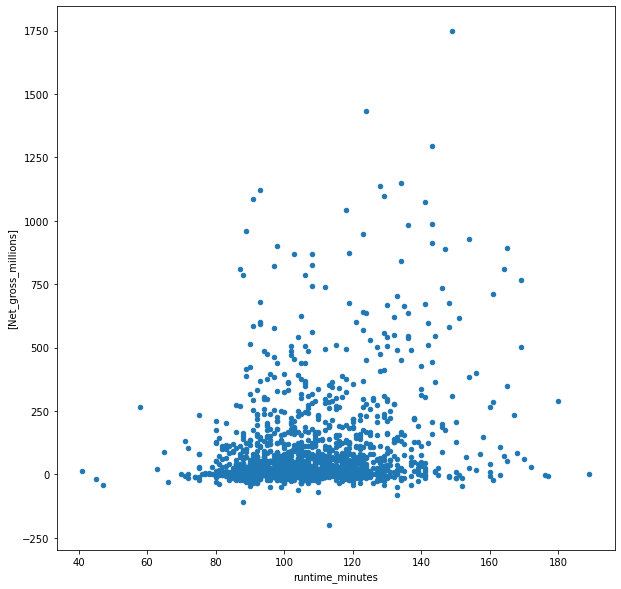

In [29]:
#scatter plot 
top_movies_dropped_null.plot(
    x="runtime_minutes", y= ["Net_gross_millions"], kind="scatter", figsize = (10,10))

In [30]:
#running correlation of run time to net gross
top_movies_dropped_null["runtime_minutes"].corr(top_movies_dropped_null["Net_Gross"])

0.2571906541402028

In [35]:
#Need to calculate average run time and average gross to give recs
print("The average run time for a moviea is", 
      round(top_movies_dropped_null["runtime_minutes"].mean()),
      "minutes.")

The average run time for a moviea is 107.0 minutes.


In [ ]:
# look at the run time of the top 100 vs rest 
# make recs on run time

## Genre Analysis

In [36]:
# Each movie has 1 up to 3 genres listed 
# Need to separate out genres 
top_movies_dropped_null[['genre1', 'genre2', 'genre3']] = top_movies_dropped_null["genres"].apply(lambda x: pd.Series(str(x).split(",")))
top_movies_dropped_null.head()


/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,runtime_minutes,genres,averagerating,numvotes,is_original_title,genre1,genre2,genre3
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,300.0,1748.134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.0,Action,Adventure,Sci-Fi
4,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,215.0,1433.854864,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.0,Action,Adventure,Sci-Fi
6,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,225.0,1292.935897,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.0,Action,Adventure,Sci-Fi
8,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,200.0,1148.258224,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.0,Action,Adventure,Sci-Fi
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,170.0,1135.772799,tt4881806,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,1.0,Action,Adventure,Sci-Fi


In [37]:
#Made 3 dataframes with each genre column and then concatenated them 
#to make 1 dataframe with 1 genre column containing all genres 

genres1= top_movies_dropped_null.drop(columns=["genres", "genre2","genre3"])
genres2= top_movies_dropped_null.drop(columns=["genres", "genre1","genre3"])
genres3= top_movies_dropped_null.drop(columns=["genres", "genre1","genre2"])

genres1= genres1.rename(columns = {"genre1":"genre"})
genres2= genres2.rename(columns = {"genre2":"genre"})
genres3= genres3.rename(columns = {"genre3":"genre"})

genres_12= pd.concat([genres1, genres2])
genres= pd.concat([genres_12, genres3])
genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,runtime_minutes,averagerating,numvotes,is_original_title,genre
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,300.0,1748.134200,tt4154756,149.0,8.5,670926.0,1.0,Action
4,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,215.0,1433.854864,tt0369610,124.0,7.0,539338.0,1.0,Action
6,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,225.0,1292.935897,tt0848228,143.0,8.1,1183655.0,1.0,Action
8,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,200.0,1148.258224,tt1825683,134.0,7.3,516148.0,1.0,Action
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,170.0,1135.772799,tt4881806,128.0,6.2,219125.0,1.0,Action


In [38]:
#Dropping NaN and grouping by genre aggragting by Net gross mean and max
genres= genres.dropna()
genres["Net_Gross"]= genres["Net_Gross"]/1000000
genres_grouped= genres.groupby("genre").agg({'Net_Gross': ['mean','max']})

genres_grouped= genres_grouped.reset_index()
genres_grouped.head(10)

genre   Net_Gross             
                      mean          max
0       Action  162.054556  1748.134200
1    Adventure  236.108241  1748.134200
2    Animation  262.454093  1086.336173
3    Biography   52.231729   839.985342
4       Comedy   90.362011  1086.336173
5        Crime   45.330178   984.846267
6  Documentary   27.702432   274.709717
7        Drama   45.410547  1122.469910
8       Family  138.406911  1099.199706
9      Fantasy  149.325332  1099.199706

In [39]:
#sorting by Net Gross mean
genres_grouped= genres_grouped.sort_values(("Net_Gross","mean"), ascending= False)

In [46]:
#sorting separate for Net Gross max
genres_grouped_max= genres_grouped.sort_values(("Net_Gross","max"), ascending= False)

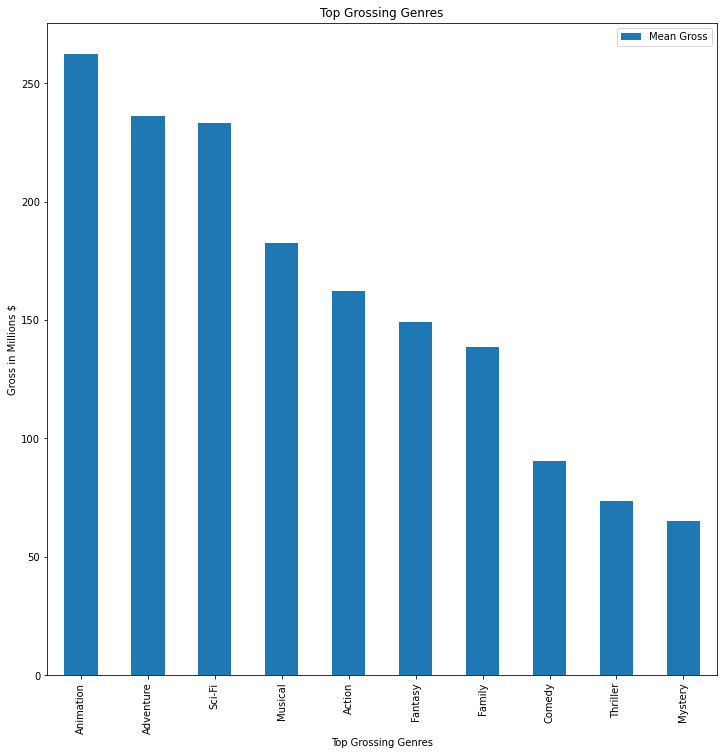

In [44]:
#plotting top 10 genres by average net gross
genres_top10= genres_grouped.head(10)
genres_top10.plot(
    x= "genre", y=("Net_Gross","mean"), kind="bar", figsize = (12,12))
plt.xlabel("Top Grossing Genres")
plt.ylabel("Gross in Millions $")
plt.legend(["Mean Gross"])
plt.title("Top Grossing Genres")
plt.show()

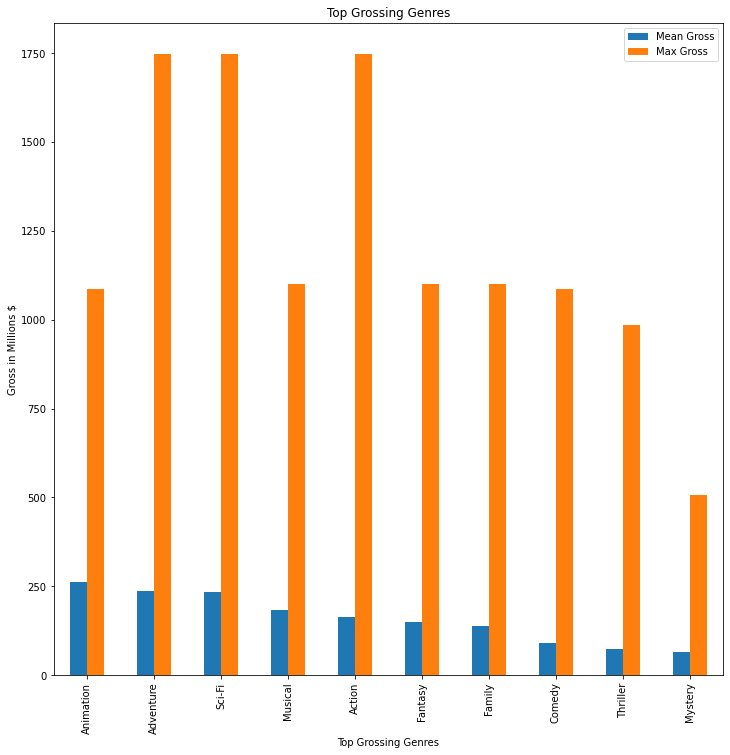

In [45]:
#plotting top 10 genres by average net gross vs which genre hamax gross
genres_top10= genres_grouped.head(10)
genres_top10.plot(
    x= "genre", y=("Net_Gross"), kind="bar", figsize = (12,12))
plt.xlabel("Top Grossing Genres")
plt.ylabel("Gross in Millions $")
plt.legend(["Mean Gross","Max Gross"])
plt.title("Top Grossing Genres")
plt.show()

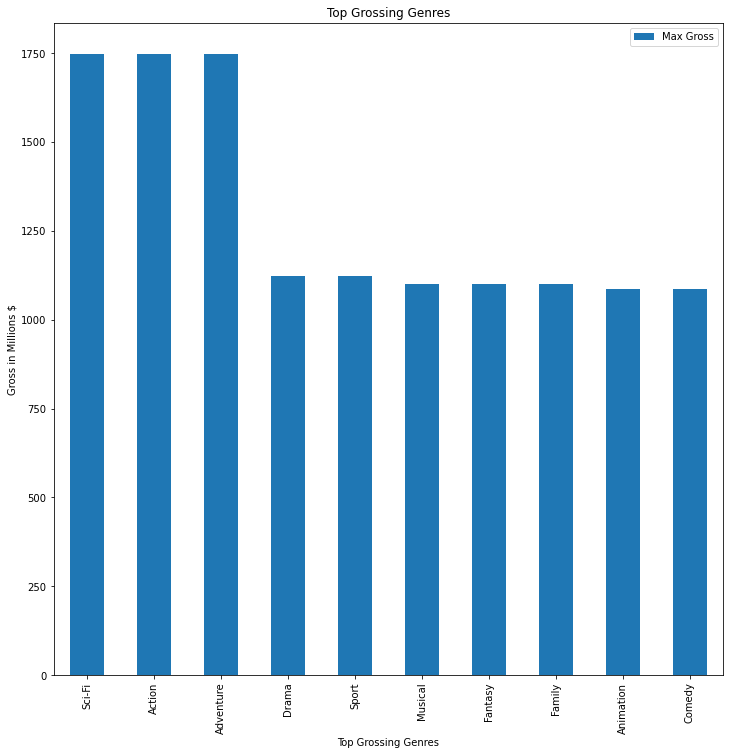

In [49]:
#plotting top 10 highest grossing movies by genre
genres_top10_max= genres_grouped_max.head(10)
genres_top10_max.plot(
    x= "genre", y=("Net_Gross","max"), kind="bar", figsize = (12,12))
plt.xlabel("Top Grossing Genres")
plt.ylabel("Gross in Millions $")
plt.legend(["Max Gross"])
plt.title("Top Grossing Genres")
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***